[-63.5796 146.738 ]
[-78.86405883  55.08354611]
0    [[-1.09, -0.74], [1.92, 3.1]]
1    [[-1.09, -0.74], [1.92, 3.1]]
Name: matrix, dtype: object
[-48.28748632  12.21240526  -3.23925488]


AttributeError: 'Axes3D' object has no attribute 'subplot'

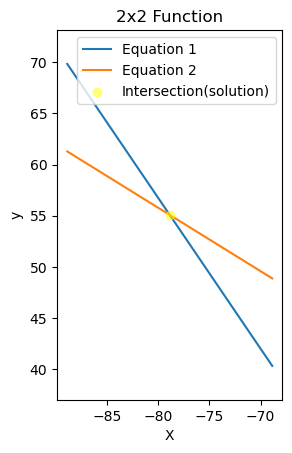

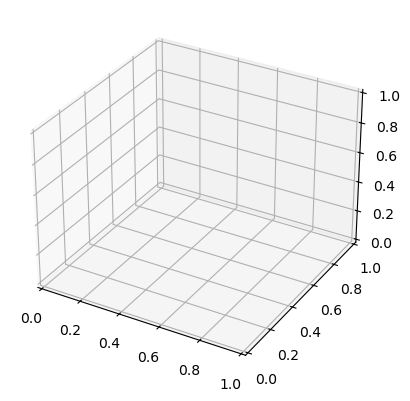

In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# -----------------------------
# 1. Define your system of equations
# Example for 2D (2 equations, 2 unknowns):
# -----------------------------

# -1.09x + -0.74y = 45.2
# 1.92x + 3.1y = 19.34
A = np.array([
    [-1.09, -0.74],
    [1.92, 3.10]
], dtype=float)

b = np.array([45.2,19.34], dtype=float)

Ab = A @ b
print(Ab)
plt.subplot(1,2,1)

# -----------------------------
# 2. Solve the system
# -----------------------------\

x = np.linalg.solve(A,b)
print(x)
x_center = x[0] # center solution around x
x_vals = np.linspace(x_center-10, x_center + 10,400) # Make a range of x values to plot lines 

# express each equation as y = f(x)
y1 = (45.2 + 1.09 * x_vals)/-0.74
y2 = (19.34 - 1.92 * x_vals)/3.1

# -----------------------------
# 3. Store solution(s) in pandas DataFrame
# -----------------------------
# df = pd.DataFrame({
#     "variable": ["x", "y"],
#     "solution": solution_2d
# })
TwoxTwo_data_csv = "TwoxTwo_data.csv"
TwoxTwo_data_df = pd.DataFrame({
    "variable": b,
    "solution": x,
})

# Put matrix in its own DataFrame bc df can't save 2x2 with these vector forms

df["matrix"] = [A] * len(df)
print(df["matrix"])

# -----------------------------
# 4. Visualization
#   - For 2D: plot both lines, highlight intersection
#   - For 3D: define 3 equations, 3 unknowns; plot planes & intersection point
# -----------------------------

# (plot line1, line2, intersection)
plt.plot(x_vals, y1, label="Equation 1")
plt.plot(x_vals, y2, label="Equation 2")
plt.xlabel("X")
plt.ylabel("y")
plt.scatter([x[0]],[x[1]], color="yellow", zorder=4, alpha=0.5, label="Intersection(solution)")
plt.legend()
plt.title("2x2 Function") # notice set_title here different than plt call (plt.title)
plt.axis("equal")

# For 3D:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
# (plot planes and solution point)
# 1.49x + 9.2y - 0.77z = 42.9
# -0.33x + 4.2z = 2.33
# 2.41x + 8.9y -2.1z = -0.88

A_3d = np.array([[1.49, 9.2, -0.77],
                [-0.33, 0, 4.2],
                [2.41, 8.9, -2.1]])
b_3d = np.array([42.9, 2.33, -0.88])


# Solve for x (Ax=b)
x_3d = np.linalg.solve(A_3d, b_3d)
print(x_3d)

x_3d_center = x_3d[0]
y_3d_center = x_3d[1]
x_3d_vals = np.linspace(x_3d_center-20, x_3d_center + 20,400)
y_3d_vals = np.linspace(y_3d_center-20, y_3d_center + 20,400)

# Express equations set equal to z
z_1 = (42.9 + (-1.49 * x_3d_vals) + (-9.2 * y_3d_vals))/-0.77
z_2 = (2.33 + (0.33 * x_3d_vals))/2.33
z_3 = (-0.88 + (-2.41 * x_3d_vals) + (-8.9 * y_3d_vals))/-2.1

# Store solutions in DataFrames
#ThreexThree_csv = "ThreexThree.csv"
#ThreexThree_df = df.DataFrame({
 #   "variable": b_3d,
  #  "solution": x_3d,
#})
ax.subplot(1,2,2)

ax.plot(x_3d_vals,y_3d_vals,z_1,label="Equation 1", color="purple")
ax.plot(x_3d_vals,y_3d_vals,z_2,label="Equation 2", color="lightgray")
ax.plot(x_3d_vals,y_3d_vals,z_3,label="Equation 3", color="blue")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_title("3x3")
ax.scatter(x_3d[0],x_3d[1],x_3d[2], alpha=0.5, color="yellow")
ax.legend()
ax.axis('equal')
plt.show()

# -----------------------------
# 5. Extensions / ideas
# -----------------------------
# - Try multiple systems and store all solutions in a DataFrame
# - Explore what happens if system is inconsistent or underdetermined
# - Animate how solution moves if coefficients vary

[-48.28748632  12.21240526  -3.23925488]


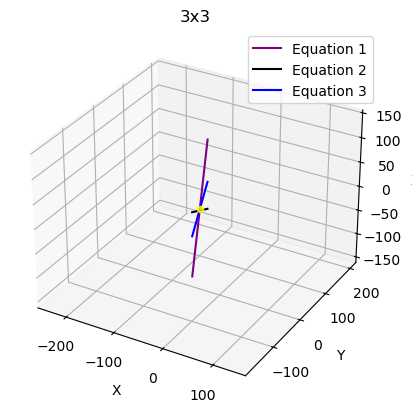

In [65]:
# For 3D:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection="3d")
# (plot planes and solution point)
# 1.49x + 9.2y - 0.77z = 42.9
# -0.33x + 4.2z = 2.33
# 2.41x + 8.9y -2.1z = -0.88

A_3d = np.array([[1.49, 9.2, -0.77],
                [-0.33, 0, 4.2],
                [2.41, 8.9, -2.1]])
b_3d = np.array([42.9, 2.33, -0.88])


# Solve for x (Ax=b)
x_3d = np.linalg.solve(A_3d, b_3d)
print(x_3d)

x_3d_center = x_3d[0]
y_3d_center = x_3d[1]
x_3d_vals = np.linspace(x_3d_center-10, x_3d_center + 10,50)
y_3d_vals = np.linspace(y_3d_center-10, y_3d_center + 10,50)

# Express equations set equal to z
z_1 = (42.9 + (-1.49 * x_3d_vals) + (-9.2 * y_3d_vals))/-0.77
z_2 = (2.33 + (0.33 * x_3d_vals))/2.33
z_3 = (-0.88 + (-2.41 * x_3d_vals) + (-8.9 * y_3d_vals))/-2.1

# Store solutions in DataFrames
#ThreexThree_csv = "ThreexThree.csv"
#ThreexThree_df = df.DataFrame({
 #   "variable": b_3d,
  #  "solution": x_3d,
#})

ax.plot(x_3d_vals,y_3d_vals,z_1,label="Equation 1", color="purple")
ax.plot(x_3d_vals,y_3d_vals,z_2,label="Equation 2", color="k")
ax.plot(x_3d_vals,y_3d_vals,z_3,label="Equation 3", color="blue")
ax.set_xlabel("X")
ax.set_ylabel("Y")
ax.set_zlabel("Z")
ax.set_title("3x3")
ax.scatter(x_3d[0],x_3d[1],x_3d[2], color="yellow", alpha=0.8)
ax.legend()
ax.axis('equal')
plt.show()

# -----------------------------
# 5. Extensions / ideas
# -----------------------------
# - Try multiple systems and store all solutions in a DataFrame
# - Explore what happens if system is inconsistent or underdetermined
# - Animate how solution moves if coefficients vary